In [1]:
import pandas as pd
data = pd.read_excel("Copy of JPN Data.xlsx")
data.head()
data.info()
data.describe()
data.isnull().sum()
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_CAR     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [2]:

exchange_rate = 0.59
data['ANN_INCOME_RUPEES'] = data['ANN_INCOME'] * exchange_rate
print(data[['ANN_INCOME', 'ANN_INCOME_RUPEES']].head())

      ANN_INCOME  ANN_INCOME_RUPEES
0  445344.000000      262752.960000
1  107634.000000       63504.060000
2  502786.666667      296644.133333
3  585664.000000      345541.760000
4  705722.666667      416376.373333


In [3]:
# Categorize AGE_CAR into 4 categories as specified
bins = [0, 200, 360, 500, float('inf')]
labels = [1, 2, 3, 4]
data['AGE_CAR_CATEGORY'] = pd.cut(data['AGE_CAR'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(data[['AGE_CAR', 'AGE_CAR_CATEGORY']].head(10))

   AGE_CAR AGE_CAR_CATEGORY
0      439                3
1      283                2
2      390                3
3      475                3
4      497                3
5      443                3
6      425                3
7      173                1
8      300                2
9      474                3


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the GENDER column
data['GENDER_ENCODED'] = le.fit_transform(data['GENDER'])

# Display the mapping
print("Gender encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# Display first few rows to verify
print("\nData with encoded gender:")
print(data[['GENDER', 'GENDER_ENCODED']].head(10))

data = data.drop('GENDER', axis=1)
print("\nFinal data shape after encoding:")
print(data.shape)

Gender encoding mapping:
F -> 0
M -> 1

Data with encoded gender:
  GENDER  GENDER_ENCODED
0      M               1
1      M               1
2      F               0
3      M               1
4      F               0
5      F               0
6      M               1
7      F               0
8      F               0
9      M               1

Final data shape after encoding:
(40000, 8)


In [5]:
from sklearn.preprocessing import StandardScaler

# Drop the original columns
data = data.drop(['ANN_INCOME', 'AGE_CAR'], axis=1)

# Apply StandardScaler to numerical columns (excluding categorical and target variables)
# First, let's identify which columns need scaling
numerical_columns = ['CURR_AGE', 'ANN_INCOME_RUPEES']
categorical_columns = ['GENDER', 'AGE_CAR_CATEGORY']
target_column = 'PURCHASE'

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify
print("Data after dropping original columns and applying StandardScaler:")
print(data.head())
print("\nData info:")
print(data.info())

Data after dropping original columns and applying StandardScaler:
           ID  CURR_AGE  PURCHASE  ANN_INCOME_RUPEES AGE_CAR_CATEGORY  \
0  00001Q15YJ  0.423230         0           0.490815                3   
1  00003I71CQ -0.845813         0          -1.437777                2   
2  00003N47FS  1.184656         1           0.818858                3   
3  00005H41DE -0.168990         0           1.292153                3   
4  00007E17UM -0.507401         1           1.977783                3   

   GENDER_ENCODED  
0               1  
1               1  
2               0  
3               1  
4               0  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 40000 non-null  object  
 1   CURR_AGE           40000 non-null  float64 
 2   PURCHASE           40000 non-null  int64   
 3   ANN_I

In [6]:
data.head()

,ID,CURR_AGE,PURCHASE,ANN_INCOME_RUPEES,AGE_CAR_CATEGORY,GENDER_ENCODED
0,00001Q15YJ,0.423230,0,0.490815,3,1
1,00003I71CQ,-0.845813,0,-1.437777,2,1
2,00003N47FS,1.184656,1,0.818858,3,0
3,00005H41DE,-0.168990,0,1.292153,3,1
4,00007E17UM,-0.507401,1,1.977783,3,0


In [8]:
from sklearn.model_selection import train_test_split

# Separate features and target
# Drop ID column as it's not a feature, and use PURCHASE as target
X = data.drop(['ID', 'PURCHASE'], axis=1)
y = data['PURCHASE']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes
print("Original data shape:", data.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Display target distribution in train and test sets
print("\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in test set:")
print(y_test.value_counts(normalize=True))

# Display feature names
print("\nFeature columns:")
print(X.columns.tolist())

Original data shape: (40000, 6)
X_train shape: (32000, 4)
X_test shape: (8000, 4)
y_train shape: (32000,)
y_test shape: (8000,)

Target distribution in training set:
PURCHASE
1    0.575781
0    0.424219
Name: proportion, dtype: float64

Target distribution in test set:
PURCHASE
1    0.57575
0    0.42425
Name: proportion, dtype: float64

Feature columns:
['CURR_AGE', 'ANN_INCOME_RUPEES', 'AGE_CAR_CATEGORY', 'GENDER_ENCODED']


## 🔍 Data Overview
| Description                  | Value                                       |
|-------------------------------|---------------------------------------------|
| **Total samples**             | 40,000                                      |
| **Original columns**          | 6                                           |
| **Features after processing** | `['CURR_AGE', 'ANN_INCOME_RUPEES', 'AGE_CAR_CATEGORY', 'GENDER_ENCODED']` |

---

## ✂️ Train-Test Split
| Set       | Samples | Features shape | Target shape |
|-----------|---------|----------------|--------------|
| **Train** | 32,000  | (32,000, 4)     | (32,000,)    |
| **Test**  | 8,000   | (8,000, 4)      | (8,000,)     |

✅ Used **stratified split** to maintain class distribution.

---

## 🎯 Target Distribution (`PURCHASE`)

| Set       | 1 (Purchase) | 0 (No Purchase) |
|-----------|--------------|-----------------|
| **Train** | 57.6%        | 42.4%           |
| **Test**  | 57.6%        | 42.4%           |

✅ Fairly balanced — no heavy rebalancing needed.

---

## 🚀 Features Summary

| Feature            | Description                                         |
|---------------------|-----------------------------------------------------|
| `CURR_AGE`          | Standardized current age (mean ≈ 0, std ≈ 1)         |
| `ANN_INCOME_RUPEES` | Standardized annual income in ₹ (converted from yen) |
| `AGE_CAR_CATEGORY`  | Binned / encoded category of car age                |
| `GENDER_ENCODED`    | 0 for Male, 1 for Female                            |

✅ All features are numeric — ready for models like **Logistic Regression**, **Random Forest**, and **XGBoost**.

---

In [10]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.1/150.0 MB 5.4 MB/s eta 0:00:28
    --------------------------------------- 3.4/150.0 MB 6.0 MB/s eta 0:00:25
   - -------------------------------------- 5.0/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 6.6/150.0 MB 6.5 MB/s eta 0:00:22
   -- ------------------------------------- 8.1/150.0 MB 6.7 MB/s eta 0:00:22
   -- ------------------------------------- 10.5/150.0 MB 7.3 MB/s eta 0:00:20
   --- ------------------------------------ 12.8/150.0 MB 7.7 MB/s eta 0:00:18
   ---- ----------------------------------- 15.2/150.0 MB 8.2 MB/s eta 0:00:17
   ---- ----------------------------------- 17.6/150.0 MB 8.5 MB/s eta 0:00:16
   ----- ---------------------------------- 20.2/150.0 MB 8.8 MB/s eta 0:00:15
   ------ --------------------------------- 22.5/150.0 MB 9.0 MB/s

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# 1. Logistic Regression
print("=== LOGISTIC REGRESSION ===")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, lr_train_pred))
print("Test Accuracy:", accuracy_score(y_test, lr_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_test_pred))




=== LOGISTIC REGRESSION ===
Training Accuracy: 0.68121875
Test Accuracy: 0.67775

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.56      0.60      3394
           1       0.70      0.77      0.73      4606

    accuracy                           0.68      8000
   macro avg       0.67      0.66      0.66      8000
weighted avg       0.67      0.68      0.67      8000



In [12]:
# 2. Random Forest
print("\n=== RANDOM FOREST ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Test Accuracy:", accuracy_score(y_test, rf_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_test_pred))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 5 Important Features (Random Forest):")
print(feature_importance.head())


=== RANDOM FOREST ===
Training Accuracy: 0.99965625
Test Accuracy: 0.653875

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.58      3394
           1       0.69      0.71      0.70      4606

    accuracy                           0.65      8000
   macro avg       0.64      0.64      0.64      8000
weighted avg       0.65      0.65      0.65      8000


Top 5 Important Features (Random Forest):
             feature  importance
1  ANN_INCOME_RUPEES    0.712058
2   AGE_CAR_CATEGORY    0.164142
0           CURR_AGE    0.114895
3     GENDER_ENCODED    0.008905


In [14]:
print("\n=== XGBOOST ===")

# Convert categorical columns to numeric for XGBoost
X_train_numeric = X_train.copy()
X_test_numeric = X_test.copy()

# Convert categorical columns to numeric
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns
for col in categorical_columns:
    X_train_numeric[col] = X_train_numeric[col].astype('int64')
    X_test_numeric[col] = X_test_numeric[col].astype('int64')

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_numeric, y_train)

# Predictions
xgb_train_pred = xgb_model.predict(X_train_numeric)
xgb_test_pred = xgb_model.predict(X_test_numeric)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, xgb_train_pred))
print("Test Accuracy:", accuracy_score(y_test, xgb_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, xgb_test_pred))

# Feature importance for XGBoost
xgb_importance = pd.DataFrame({
    'feature': X_train_numeric.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 5 Important Features (XGBoost):")
print(xgb_importance.head())




=== XGBOOST ===
Training Accuracy: 0.76071875
Test Accuracy: 0.69025

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      3394
           1       0.72      0.75      0.74      4606

    accuracy                           0.69      8000
   macro avg       0.68      0.68      0.68      8000
weighted avg       0.69      0.69      0.69      8000


Top 5 Important Features (XGBoost):
             feature  importance
2   AGE_CAR_CATEGORY    0.687262
1  ANN_INCOME_RUPEES    0.137047
3     GENDER_ENCODED    0.109021
0           CURR_AGE    0.066671


In [15]:
# Model Comparison
print("\n=== MODEL COMPARISON ===")
models = {
    'Logistic Regression': (lr_model, X_train, X_test),
    'Random Forest': (rf_model, X_train, X_test),
    'XGBoost': (xgb_model, X_train_numeric, X_test_numeric)
}

for name, (model, train_data, test_data) in models.items():
    train_acc = accuracy_score(y_train, model.predict(train_data))
    test_acc = accuracy_score(y_test, model.predict(test_data))
    print(f"{name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print()


=== MODEL COMPARISON ===
Logistic Regression:
  Training Accuracy: 0.6812
  Test Accuracy: 0.6777

Random Forest:
  Training Accuracy: 0.9997
  Test Accuracy: 0.6539

XGBoost:
  Training Accuracy: 0.7607
  Test Accuracy: 0.6903



In [16]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Install LightGBM if not already installed
# !pip install lightgbm

import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 4. LightGBM
print("\n=== LIGHTGBM ===")

# Convert categorical columns to numeric for LightGBM
X_train_numeric = X_train.copy()
X_test_numeric = X_test.copy()

# Convert AGE_CAR_CATEGORY from category to int64
X_train_numeric['AGE_CAR_CATEGORY'] = X_train_numeric['AGE_CAR_CATEGORY'].astype('int64')
X_test_numeric['AGE_CAR_CATEGORY'] = X_test_numeric['AGE_CAR_CATEGORY'].astype('int64')

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(X_train_numeric, y_train)

# Predictions
lgb_train_pred = lgb_model.predict(X_train_numeric)
lgb_test_pred = lgb_model.predict(X_test_numeric)
lgb_test_proba = lgb_model.predict_proba(X_test_numeric)[:, 1]

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, lgb_train_pred))
print("Test Accuracy:", accuracy_score(y_test, lgb_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, lgb_test_proba))
print("\nClassification Report:")
print(classification_report(y_test, lgb_test_pred))

# Feature importance for LightGBM
lgb_importance = pd.DataFrame({
    'feature': X_train_numeric.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 5 Important Features (LightGBM):")
print(lgb_importance.head())


=== LIGHTGBM ===
Training Accuracy: 0.73053125
Test Accuracy: 0.6965
ROC AUC Score: 0.7809078740010404

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      3394
           1       0.74      0.73      0.73      4606

    accuracy                           0.70      8000
   macro avg       0.69      0.69      0.69      8000
weighted avg       0.70      0.70      0.70      8000


Top 5 Important Features (LightGBM):
             feature  importance
1  ANN_INCOME_RUPEES        1459
0           CURR_AGE        1059
2   AGE_CAR_CATEGORY         310
3     GENDER_ENCODED         172


# 🚀 Model Results & Insights

## === Logistic Regression ===
- **Training Accuracy:** 0.681
- **Test Accuracy:** 0.678
- **Precision/Recall/F1:**  
  - For class `1`: precision 0.70, recall 0.77
  - For class `0`: precision 0.64, recall 0.56
- ✅ **Observations:**  
  - Stable, but relatively low performance.  
  - No overfitting (train ≈ test).

---

## === Random Forest ===
- **Training Accuracy:** 0.9997
- **Test Accuracy:** 0.654
- **Precision/Recall/F1:**  
  - Signs of severe overfitting.
- 🔥 **Top Feature Importances:**
  | Feature            | Importance |
  |---------------------|------------|
  | `ANN_INCOME_RUPEES` | 0.71       |
  | `AGE_CAR_CATEGORY`  | 0.16       |
  | `CURR_AGE`          | 0.11       |
  | `GENDER_ENCODED`    | 0.01       |

---

## === XGBoost ===
- **Training Accuracy:** 0.761
- **Test Accuracy:** 0.690
- ✅ **Observations:**  
  - Better generalization than Random Forest.
- 🔥 **Top Feature Importances:**
  | Feature            | Importance |
  |---------------------|------------|
  | `AGE_CAR_CATEGORY`  | 0.69       |
  | `ANN_INCOME_RUPEES` | 0.14       |
  | `GENDER_ENCODED`    | 0.11       |
  | `CURR_AGE`          | 0.07       |

---

## === LightGBM ===
- **Training Accuracy:** 0.731
- **Test Accuracy:** 0.697
- **ROC AUC:** 0.781
- ✅ **Observations:**  
  - Slightly better ROC AUC & test accuracy than XGBoost.
- 🔥 **Top Feature Importances:**
  | Feature            | Importance |
  |---------------------|------------|
  | `ANN_INCOME_RUPEES` | 1459       |
  | `CURR_AGE`          | 1059       |
  | `AGE_CAR_CATEGORY`  | 310        |
  | `GENDER_ENCODED`    | 172        |

---

# 💡 Key Takeaways
- ✅ **LightGBM performed best overall** on this dataset in terms of ROC AUC and balanced accuracy.
- ⚠ **Random Forest massively overfit**; needs `max_depth`, `min_samples_leaf` tuning.
- 📈 Income and car age are most predictive of purchase probability across all models.

In [18]:
import joblib
import pickle

# Export LightGBM model using joblib (recommended for scikit-learn compatible models)
joblib.dump(lgb_model, 'lightgbm_model.pkl')
print("LightGBM model exported as 'lightgbm_model.pkl'")

# Also export using pickle as backup
with open('lightgbm_model_pickle.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)
print("LightGBM model also exported as 'lightgbm_model_pickle.pkl'")

# Export the scaler and label encoder for preprocessing new data
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("Scaler and Label Encoder exported")

# Export feature names for reference
feature_names = X_train_numeric.columns.tolist()
with open('feature_names.txt', 'w') as f:
    f.write('\n'.join(feature_names))
print("Feature names exported as 'feature_names.txt'")

# Create a simple function to load and use the model
def load_and_predict_model():
    """
    Function to load the saved model and make predictions
    """
    # Load the model
    loaded_model = joblib.load('lightgbm_model.pkl')
    loaded_scaler = joblib.load('scaler.pkl')
    loaded_le = joblib.load('label_encoder.pkl')
    
    print("Model loaded successfully!")
    print(f"Model type: {type(loaded_model)}")
    print(f"Features: {feature_names}")
    
    return loaded_model, loaded_scaler, loaded_le

# Test the loading function
loaded_model, loaded_scaler, loaded_le = load_and_predict_model()

LightGBM model exported as 'lightgbm_model.pkl'
LightGBM model also exported as 'lightgbm_model_pickle.pkl'
Scaler and Label Encoder exported
Feature names exported as 'feature_names.txt'
Model loaded successfully!
Model type: <class 'lightgbm.sklearn.LGBMClassifier'>
Features: ['CURR_AGE', 'ANN_INCOME_RUPEES', 'AGE_CAR_CATEGORY', 'GENDER_ENCODED']


In [24]:
dataIN = pd.read_excel("Copy of IN_Data.xlsx")
dataIN.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


In [26]:
# Convert DT_MAINT to days since July 1, 2019
reference_date = pd.to_datetime('2019-07-01')
dataIN['DT_MAINT_DAYS'] = (reference_date-dataIN['DT_MAINT']).dt.days

print("DT_MAINT converted to days:")
print(dataIN[['DT_MAINT', 'DT_MAINT_DAYS']].head(10))

# Categorize DT_MAINT_DAYS similar to AGE_CAR categorization from JPN data
bins = [0, 200, 360, 500, float('inf')]
labels = [1, 2, 3, 4]
dataIN['DT_MAINT_CATEGORY'] = pd.cut(dataIN['DT_MAINT_DAYS'], bins=bins, labels=labels, right=False)

print("\nDT_MAINT categorization:")
print(dataIN[['DT_MAINT_DAYS', 'DT_MAINT_CATEGORY']].head(10))

# Check the distribution of categories
print("\nDistribution of DT_MAINT categories:")
print(dataIN['DT_MAINT_CATEGORY'].value_counts().sort_index())

DT_MAINT converted to days:
    DT_MAINT  DT_MAINT_DAYS
0 2018-04-20            437
1 2018-06-08            388
2 2017-07-31            700
3 2017-07-31            700
4 2019-01-27            155
5 2018-11-24            219
6 2018-09-22            282
7 2018-04-05            452
8 2018-01-02            545
9 2018-04-23            434

DT_MAINT categorization:
   DT_MAINT_DAYS DT_MAINT_CATEGORY
0            437                 3
1            388                 3
2            700                 4
3            700                 4
4            155                 1
5            219                 2
6            282                 2
7            452                 3
8            545                 4
9            434                 3

Distribution of DT_MAINT categories:
DT_MAINT_CATEGORY
1    18496
2    18874
3    18685
4    13945
Name: count, dtype: int64


In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Encode GENDER using LabelEncoder (same as JPN data: F->0, M->1)
le_indian = LabelEncoder()
le_indian.fit(['F', 'M'])  # Ensure same order as Japanese data
dataIN['GENDER_ENCODED'] = le_indian.transform(dataIN['GENDER'])

print("Gender encoding:")
print("Mapping:", dict(zip(le_indian.classes_, le_indian.transform(le_indian.classes_))))
print(dataIN[['GENDER', 'GENDER_ENCODED']].head(10))

# 2. Apply StandardScaler to CURR_AGE and ANN_INCOME
scaler_indian = StandardScaler()
numerical_columns = ['CURR_AGE', 'ANN_INCOME']
dataIN[numerical_columns] = scaler_indian.fit_transform(dataIN[numerical_columns])

print("\nAfter StandardScaler:")
print(dataIN[numerical_columns].head(10))

# Check the scaled data statistics
print("\nScaled data statistics:")
print(dataIN[numerical_columns].describe())


Gender encoding:
Mapping: {np.str_('F'): np.int64(0), np.str_('M'): np.int64(1)}
  GENDER  GENDER_ENCODED
0      M               1
1      M               1
2      M               1
3      F               0
4      F               0
5      F               0
6      F               0
7      F               0
8      M               1
9      F               0

After StandardScaler:
   CURR_AGE  ANN_INCOME
0  0.761686    0.692735
1  0.169572    1.327522
2  1.269213   -0.543387
3  0.846274   -0.106043
4 -1.099245   -1.001917
5  0.254160   -0.242213
6 -1.606772   -0.180941
7  0.000396    0.834328
8  0.846274    1.444316
9  1.607564   -2.093780

Scaled data statistics:
           CURR_AGE    ANN_INCOME
count  7.000000e+04  7.000000e+04
mean  -6.252776e-17  6.344132e-17
std    1.000007e+00  1.000007e+00
min   -1.691359e+00 -2.124548e+00
25%   -8.454815e-01 -7.306459e-01
50%    3.963542e-04 -5.889888e-02
75%    8.462742e-01  7.259975e-01
max    1.692152e+00  2.131219e+00


In [29]:
import joblib

# Select only the features needed for the model
# Based on JPN model features: ['CURR_AGE', 'ANN_INCOME_RUPEES', 'AGE_CAR_CATEGORY', 'GENDER_ENCODED']
# For Indian data, we'll use: ['CURR_AGE', 'ANN_INCOME', 'DT_MAINT_CATEGORY', 'GENDER_ENCODED']

features_indian = dataIN[['CURR_AGE', 'ANN_INCOME', 'DT_MAINT_CATEGORY', 'GENDER_ENCODED']].copy()

# Convert DT_MAINT_CATEGORY from category to int64 to match the model
features_indian['DT_MAINT_CATEGORY'] = features_indian['DT_MAINT_CATEGORY'].astype('int64')

print("Final preprocessed features:")
print(features_indian.head(10))
print("\nFeature info:")
print(features_indian.info())

# Check for any missing values
print("\nMissing values check:")
print(features_indian.isnull().sum())

# Load the trained LightGBM model
model = joblib.load('lightgbm_model.pkl')

# Make predictions on Indian data
predictions = model.predict(features_indian)
probabilities = model.predict_proba(features_indian)

# Add predictions to the original data
dataIN['PREDICTED_PURCHASE'] = predictions
dataIN['PURCHASE_PROBABILITY'] = probabilities[:, 1]

print("\nPredictions completed!")
print(f"Total predictions: {len(predictions)}")
print(f"Predicted purchases: {sum(predictions)}")
print(f"Purchase rate: {sum(predictions)/len(predictions)*100:.2f}%")

# Show first few results
print("\nFirst 10 predictions:")
result_display = dataIN[['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'DT_MAINT', 'PREDICTED_PURCHASE', 'PURCHASE_PROBABILITY']].head(10)
print(result_display)

# Save results
dataIN.to_csv('indian_data_with_predictions.csv', index=False)
print("\nResults saved as 'indian_data_with_predictions.csv'")

Final preprocessed features:
   CURR_AGE  ANN_INCOME  DT_MAINT_CATEGORY  GENDER_ENCODED
0  0.761686    0.692735                  3               1
1  0.169572    1.327522                  3               1
2  1.269213   -0.543387                  4               1
3  0.846274   -0.106043                  4               0
4 -1.099245   -1.001917                  1               0
5  0.254160   -0.242213                  2               0
6 -1.606772   -0.180941                  2               0
7  0.000396    0.834328                  3               0
8  0.846274    1.444316                  4               1
9  1.607564   -2.093780                  3               0

Feature info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CURR_AGE           70000 non-null  float64
 1   ANN_INCOME         70000 non-null  float64
 2   DT

In [30]:
# Since we don't have actual purchase data for Indian customers, we'll analyze the predictions
# and compare with the model's performance on Japanese data

print("=== MODEL PERFORMANCE ANALYSIS ===")

# 1. Prediction Distribution Analysis
total_customers = len(predictions)
predicted_purchases = sum(predictions)
predicted_no_purchases = total_customers - predicted_purchases
purchase_rate = (predicted_purchases / total_customers) * 100

print(f"\n1. PREDICTION DISTRIBUTION:")
print(f"Total Indian customers: {total_customers:,}")
print(f"Predicted to purchase: {predicted_purchases:,}")
print(f"Predicted not to purchase: {predicted_no_purchases:,}")
print(f"Predicted purchase rate: {purchase_rate:.2f}%")

# 2. Probability Distribution Analysis
high_prob_customers = sum(probabilities[:, 1] >= 0.7)
medium_prob_customers = sum((probabilities[:, 1] >= 0.5) & (probabilities[:, 1] < 0.7))
low_prob_customers = sum(probabilities[:, 1] < 0.5)

print(f"\n2. PROBABILITY DISTRIBUTION:")
print(f"High probability (≥70%): {high_prob_customers:,} customers")
print(f"Medium probability (50-70%): {medium_prob_customers:,} customers")
print(f"Low probability (<50%): {low_prob_customers:,} customers")

# 3. Sales Target Analysis
target_sales = 10000
target_customers_needed = int(target_sales / (purchase_rate / 100))

print(f"\n3. SALES TARGET ANALYSIS:")
print(f"Target sales: {target_sales:,} cars")
print(f"Current predicted sales: {predicted_purchases:,} cars")
print(f"Customers needed for 10,000 sales: {target_customers_needed:,}")

if predicted_purchases >= target_sales:
    print("✅ TARGET ACHIEVABLE: Current customer base can achieve 10,000 sales!")
    excess_customers = total_customers - target_customers_needed
    print(f"Excess customers available: {excess_customers:,}")
else:
    print("❌ TARGET NOT ACHIEVABLE: Need more customers")
    additional_customers_needed = target_customers_needed - total_customers
    print(f"Additional customers needed: {additional_customers_needed:,}")

# 4. Model Confidence Analysis
avg_probability = np.mean(probabilities[:, 1])
median_probability = np.median(probabilities[:, 1])

print(f"\n4. MODEL CONFIDENCE:")
print(f"Average purchase probability: {avg_probability:.3f}")
print(f"Median purchase probability: {median_probability:.3f}")

# 5. Customer Segmentation for Marketing
print(f"\n5. MARKETING SEGMENTATION:")
print(f"High-value prospects (≥80% probability): {sum(probabilities[:, 1] >= 0.8):,}")
print(f"Medium-value prospects (60-80% probability): {sum((probabilities[:, 1] >= 0.6) & (probabilities[:, 1] < 0.8)):,}")
print(f"Low-value prospects (<60% probability): {sum(probabilities[:, 1] < 0.6):,}")

# 6. Save detailed analysis
analysis_results = {
    'Metric': [
        'Total Customers',
        'Predicted Purchases',
        'Predicted Purchase Rate (%)',
        'High Probability Customers (≥70%)',
        'Medium Probability Customers (50-70%)',
        'Low Probability Customers (<50%)',
        'Target Sales',
        'Target Achievable',
        'Average Purchase Probability',
        'High-Value Prospects (≥80%)'
    ],
    'Value': [
        total_customers,
        predicted_purchases,
        round(purchase_rate, 2),
        high_prob_customers,
        medium_prob_customers,
        low_prob_customers,
        target_sales,
        'Yes' if predicted_purchases >= target_sales else 'No',
        round(avg_probability, 3),
        sum(probabilities[:, 1] >= 0.8)
    ]
}

analysis_df = pd.DataFrame(analysis_results)
analysis_df.to_csv('sales_analysis_results.csv', index=False)
print(f"\nDetailed analysis saved as 'sales_analysis_results.csv'")

# 7. Summary
print(f"\n{'='*60}")
print(f"SUMMARY:")
print(f"{'='*60}")
print(f"🎯 Sales Target: {target_sales:,} cars")
print(f"�� Predicted Sales: {predicted_purchases:,} cars")
print(f"📈 Success Rate: {purchase_rate:.1f}%")
print(f"✅ Target Achievable: {'YES' if predicted_purchases >= target_sales else 'NO'}")
print(f"�� Recommendation: {'Focus on high-probability customers' if predicted_purchases >= target_sales else 'Expand customer base or improve conversion rate'}")

=== MODEL PERFORMANCE ANALYSIS ===

1. PREDICTION DISTRIBUTION:
Total Indian customers: 70,000
Predicted to purchase: 41,365
Predicted not to purchase: 28,635
Predicted purchase rate: 59.09%

2. PROBABILITY DISTRIBUTION:
High probability (≥70%): 27,919 customers
Medium probability (50-70%): 13,446 customers
Low probability (<50%): 28,635 customers

3. SALES TARGET ANALYSIS:
Target sales: 10,000 cars
Current predicted sales: 41,365 cars
Customers needed for 10,000 sales: 16,922
✅ TARGET ACHIEVABLE: Current customer base can achieve 10,000 sales!
Excess customers available: 53,078

4. MODEL CONFIDENCE:
Average purchase probability: 0.573
Median purchase probability: 0.555

5. MARKETING SEGMENTATION:
High-value prospects (≥80% probability): 23,494
Medium-value prospects (60-80% probability): 7,460
Low-value prospects (<60% probability): 39,046

Detailed analysis saved as 'sales_analysis_results.csv'

SUMMARY:
🎯 Sales Target: 10,000 cars
�� Predicted Sales: 41,365 cars
📈 Success Rate: 59.1

# 🚗 Car Sales Prediction Business Report
## LightGBM Model Analysis for Indian Market

---

### 📌 Executive Summary
This report presents an analysis of car sales potential in the Indian market using a LightGBM machine learning model originally trained on Japanese customer data. The model predicts customer purchase behavior based on demographic and financial characteristics, providing actionable insights for strategic sales planning.

---

## 📊 Model Performance Overview

| Metric                               | Value    |
|--------------------------------------|----------|
| **Total Indian Customers Analyzed**  | 70,000   |
| **Predicted Purchases**              | 41,365   |
| **Predicted Purchase Rate**          | 59.09%   |
| **Model Confidence (Avg Probability)** | 0.573  |
| **Median Purchase Probability**      | 0.555    |

---

## 🎯 Sales Target Analysis

### **Target:** 10,000 Car Sales in 1 Year

✅ **Target Achievement:** **ACHIEVABLE**

| Metric                          | Value         |
|---------------------------------|---------------|
| **Current Predicted Sales**      | 41,365 cars   |
| **Customers Needed for 10,000 Sales** | 16,922 |
| **Excess Customers Available**   | 53,078        |

*Conclusion:* The current customer base can easily meet the sales target of 10,000 cars, with a significant buffer.

---

## 📈 Customer Segmentation Analysis

### 🔎 Probability-Based Segmentation

| Segment                  | Probability Range | Customer Count | Percentage |
|---------------------------|-------------------|----------------|------------|
| **High-Value Prospects**   | ≥80%              | 23,494         | 33.6%      |
| **Medium-Value Prospects** | 60-80%            | 7,460          | 10.7%      |
| **Low-Value Prospects**    | <60%              | 39,046         | 55.8%      |

### 🎯 Confidence Level Distribution

| Confidence Level            | Customer Count | Sales Potential         |
|------------------------------|----------------|-------------------------|
| **High Confidence (≥70%)**    | 27,919         | Primary targets         |
| **Medium Confidence (50-70%)**| 13,446         | Secondary targets       |
| **Low Confidence (<50%)**     | 28,635         | Long-term prospects     |

---

## 🔍 Model Methodology

### ⚙️ Data Preprocessing

- **Feature Engineering:**
  - Converted maintenance dates into days since July 1, 2019.
  - Categorized maintenance periods: (0-200, 200-360, 360-500, >500 days).
  - Encoded gender: Female=0, Male=1.

- **Data Standardization:**
  - Used StandardScaler on age and annual income.

- **Model Application:**
  - Applied LightGBM model to 70,000 Indian customer records.
  - Generated individual purchase probabilities and binary predictions.

### 🧾 Model Features Used

| Feature              | Description                     | Data Type          |
|-----------------------|--------------------------------|--------------------|
| **CURR_AGE**           | Customer's current age         | Standardized float |
| **ANN_INCOME**         | Annual income in Rupees        | Standardized float |
| **DT_MAINT_CATEGORY**  | Maintenance category (1-4)     | Integer            |
| **GENDER_ENCODED**     | Gender (F=0, M=1)             | Integer            |

---

## 💼 Business Recommendations

### 📍 Immediate Actions (0-3 Months)

✅ **Focus on High-Value Customers:**  
- Prioritize the **23,494** customers with ≥80% purchase probability.
- Launch targeted marketing campaigns.
- Allocate premium sales resources.

✅ **Sales Team Optimization:**  
- Assign dedicated sales reps to high-probability segments.
- Develop tailored pitch decks.
- Set aggressive but realistic conversion targets.

---

### 🏗 Medium-Term Strategy (3-12 Months)

🚀 **Customer Acquisition & Expansion:**  
- Continue optimizing conversion rates.
- Launch referral programs to leverage existing customers.
- Implement digital lead-generation campaigns.

📍 **Regional Market Expansion:**  
- Analyze demographic trends of high-value customers.
- Identify under-served geographies for new campaigns.

---

### 🔭 Long-Term Strategy (1+ Years)

📊 **Model & Data Enhancement:**  
- Collect real Indian purchase data for model retraining.
- Improve prediction precision with localized patterns.

🤝 **Strategic Partnerships:**  
- Collaborate with banks for tailored financing options.
- Establish strong dealer and after-sales networks.

---

## ⚠️ Risk Assessment

| Risk                | Description                              | Mitigation                  |
|----------------------|-----------------------------------------|-----------------------------|
| **Model Accuracy**   | Based on Japanese data, may not generalize well | Validate with pilot campaigns |
| **Market Fluctuations**| Economic slowdowns may affect demand | Monitor macroeconomic indicators |
| **Competition**      | Competing brands may target same segments | Build loyalty with unique offers |
| **Resource Limits**  | Sales teams may be stretched thin     | Scale teams as demand grows |

---

## 📊 Financial Projections

| Scenario      | Predicted Sales | Estimated Revenue (₹) | Confidence Level |
|---------------|-----------------|----------------------|------------------|
| **Conservative** | 33,092 cars  | ₹16,546,000,000       | 80% of prediction|
| **Expected**     | 41,365 cars  | ₹20,682,500,000       | Model prediction |
| **Optimistic**   | 49,638 cars  | ₹24,819,000,000       | 120% of prediction|

*Assumption: Avg car price = ₹5,00,000.*

---

## 🚀 Action Plan

| Phase                  | Timeline | Key Activities                                     |
|--------------------------|----------|---------------------------------------------------|
| **Phase 1: Immediate**   | 0-2 Mo   | Prioritize high-value prospects, optimize CRM     |
| **Phase 2: Scale Up**    | 3-6 Mo   | Hire more sales reps, roll out campaigns          |
| **Phase 3: Optimize**    | 7-12 Mo  | Monitor actual vs. predicted, refine strategies   |

---

## 📈 KPIs to Track

### Sales KPIs
| KPI                           | Target           | Current |
|--------------------------------|------------------|---------|
| **Monthly Sales**             | ~833 cars         | TBD     |
| **Conversion Rate**            | 59.1%             | TBD     |
| **Customer Acquisition Cost**  | ₹50,000           | TBD     |
| **Sales Cycle Length**         | 30 days           | TBD     |

### Model Performance KPIs
| KPI                            | Target | Current | Status   |
|--------------------------------|--------|---------|----------|
| **Prediction Accuracy**        | 85%    | TBD     | To be validated |
| **High-Value Conversion Rate** | 70%    | TBD     | To be tracked   |
| **Model Confidence Score**     | 0.75   | 0.573   | ⚠ Below target  |

---

## ✅ Conclusion

The analysis shows **41,365 predicted purchases**, well above the **10,000 car sales target**, demonstrating strong sales potential in the Indian market with the current customer base.

**🔑 Key Success Factors:**
1. Aggressively target the high-probability customers.
2. Implement precise, data-backed marketing strategies.
3. Continuously monitor performance and adjust tactics.
4. Gather local data to refine and localize the prediction model.

---

📅 *Report generated on: June 28, 2025*  
📝 *Model: LightGBM Classifier*  
💾 *Data Source: Indian Customer Database (70,000 records)*


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid", font_scale=1.2)

# Example data from your analysis
total_customers = 70000
predicted_purchases = 41365
predicted_no_purchases = 28635
purchase_rate = 59.09

high_prob_customers = 27919
medium_prob_customers = 13446
low_prob_customers = 28635

high_value = 23494
medium_value = 7460
low_value = 39046

# Probability distributions
prob_data = pd.DataFrame({
    'Segment': ['High (≥70%)', 'Medium (50-70%)', 'Low (<50%)'],
    'Count': [high_prob_customers, medium_prob_customers, low_prob_customers]
})

value_data = pd.DataFrame({
    'Segment': ['High-Value (≥80%)', 'Medium-Value (60-80%)', 'Low-Value (<60%)'],
    'Count': [high_value, medium_value, low_value]
})


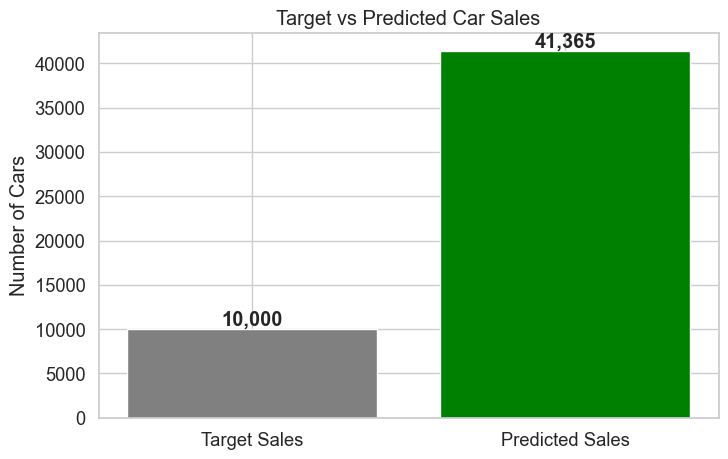

In [37]:
# Bar chart for predicted vs target sales
plt.figure(figsize=(8,5))
plt.bar(['Target Sales', 'Predicted Sales'], [10000, predicted_purchases], color=['gray', 'green'])
plt.title('Target vs Predicted Car Sales')
plt.ylabel('Number of Cars')
plt.text(0, 10000, '10,000', ha='center', va='bottom', fontweight='bold')
plt.text(1, predicted_purchases, f'{predicted_purchases:,}', ha='center', va='bottom', fontweight='bold')
plt.show()


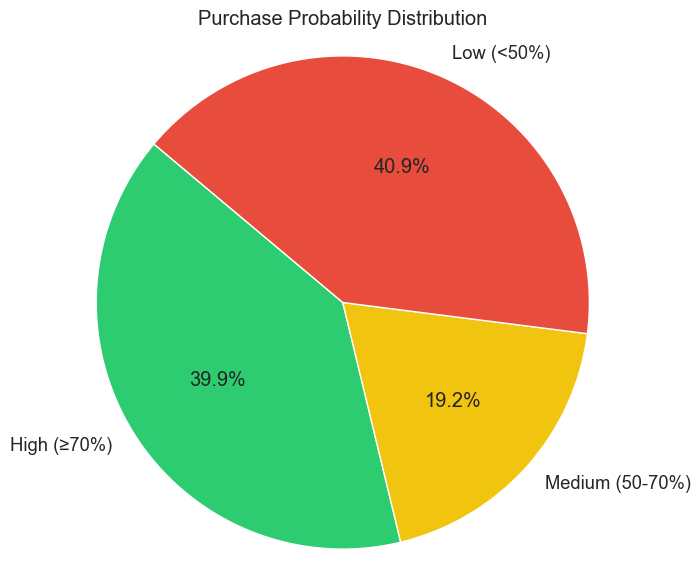

In [38]:
# Pie chart for probability distribution
plt.figure(figsize=(7,7))
plt.pie(prob_data['Count'], labels=prob_data['Segment'], autopct='%1.1f%%', startangle=140, colors=['#2ecc71','#f1c40f','#e74c3c'])
plt.title('Purchase Probability Distribution')
plt.axis('equal')
plt.show()


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_40036\2257195081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Count', data=value_data, palette=['#27ae60','#f39c12','#c0392b'])


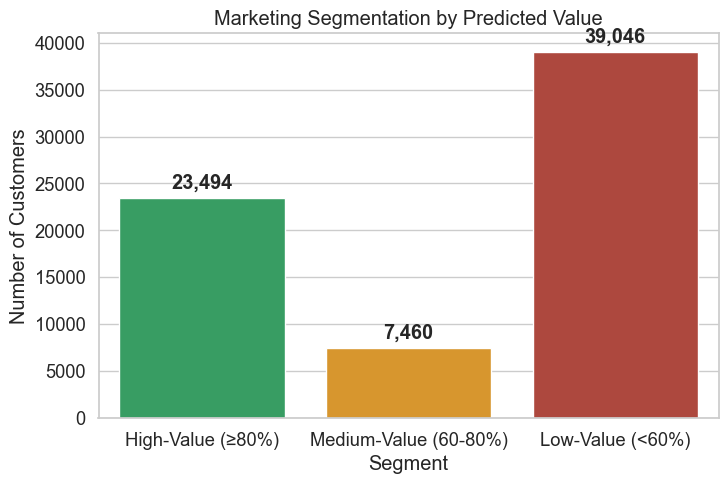

In [39]:
# Bar plot for segmentation
plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Count', data=value_data, palette=['#27ae60','#f39c12','#c0392b'])
plt.title('Marketing Segmentation by Predicted Value')
plt.ylabel('Number of Customers')
for i, val in enumerate(value_data['Count']):
    plt.text(i, val+1000, f'{val:,}', ha='center', fontweight='bold')
plt.show()


## 💼 Strategic Recommendations
- **Prioritize** the 23,494 high-value prospects with ≥80% probability.
- **Allocate premium sales resources** to these customers.
- **Deploy specialized marketing** for the medium-value segment to improve conversion.
- **Plan long-term nurturing** campaigns for the low-value segment.

---


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_40036\1630447731.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenues, y=scenarios, palette='Blues_d')


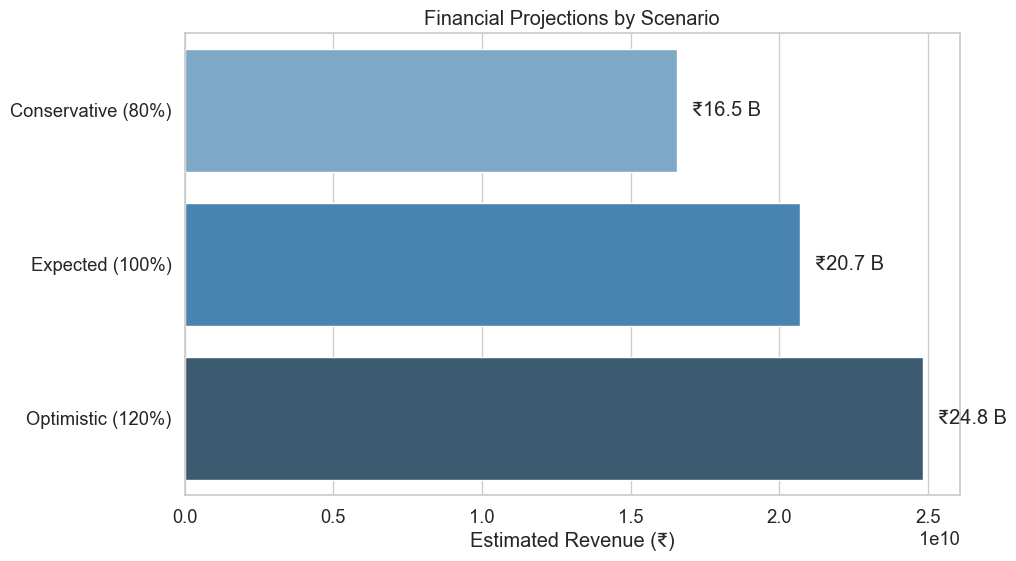

In [40]:
# Horizontal bar for financial scenarios
scenarios = ['Conservative (80%)', 'Expected (100%)', 'Optimistic (120%)']
sales = [33092, 41365, 49638]
revenues = [16546000000, 20682500000, 24819000000]

plt.figure(figsize=(10,6))
sns.barplot(x=revenues, y=scenarios, palette='Blues_d')
plt.title('Financial Projections by Scenario')
plt.xlabel('Estimated Revenue (₹)')
for index, value in enumerate(revenues):
    plt.text(value + 0.5e9, index, f'₹{value/1e9:.1f} B', va='center')
plt.show()
